In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import os
import gc
import seaborn as sns
import tensorflow as tf
import scipy.misc

from os import listdir
from os.path import isfile, join

from skimage.transform import resize

import warnings
print('TF',tf.__version__)
print('NP',np.__version__)

TF 1.13.1
NP 1.16.4


In [0]:
def download_labels():
  
  if  os.path.isfile('train.csv')==False:

    !wget 'https://s3.amazonaws.com/google-landmark/metadata/train.csv'

  train_data = pd.read_csv('train.csv')
  print('Number of examples: ',len(train_data))
  
  return train_data
  
train_data=download_labels()


Number of examples:  4132914


In [0]:
print("Training data size",train_data.shape)

Training data size (4132914, 3)


In [0]:
train_data.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


In [0]:
id = 4444
print('id:', train_data['id'][temp])
print('url:', train_data['url'][temp])
print('landmark id:', train_data['landmark_id'][temp])

id 3c1138a4a5369aca
url: http://upload.wikimedia.org/wikipedia/commons/7/7f/Interieur%2C_terug_gevonden_fragment_figuratief_reli%C3%ABf_-_Breda_-_20362006_-_RCE.jpg
landmark id: 51856


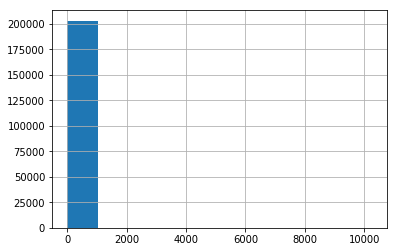

In [0]:
train_data['landmark_id'].value_counts().hist()

In [0]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(100))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,138982,10247
1,62798,4333
2,177870,3327
3,176528,3243
4,192931,2627
5,126637,2589
6,83144,2351
7,171772,2268
8,20409,2248
9,151942,1727


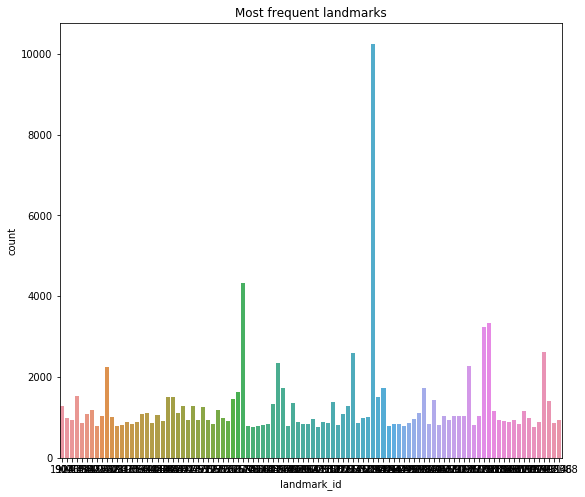

In [0]:
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [0]:
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,22473,1
1,70512,1
2,127852,1
3,134828,1
4,139519,1
5,24520,1
6,17242,1
7,133954,1


In [0]:
print("Number of classes under 20 occurences",(train_data['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train_data['landmark_id'].unique()))

Number of classes under 20 occurences 152925 out of total number of categories 203094


In [0]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [0]:
category = train_data['landmark_id'].value_counts().keys()[5]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")
#print(urls.keys)
print(urls[1555])

https://upload.wikimedia.org/wikipedia/commons/c/c8/45_Parliament%2C_at_dusk%2C_2015_08_04_%281%29.JPG_-_panoramio.jpg


In [0]:
category = train_data['landmark_id'].value_counts().keys()[1]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")
#print(urls.index)
#print(urls[9808])

#Reference: 
https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis 
</br>
https://www.kaggle.com/mayukh18/dataset-exploration-and-simple-on-the-fly-training